# Analysis of teams

This notebook contains analyses of teams that participated at the **`Copa America 2021`**. The analyses included are: `Goal contribution`, `Goal scoring`, `Progressive actions`, `Defensive actions`, and others. Inspiration is primarly taken from [@TalkingUnited](https://twitter.com/TalkingUnited).

## Load libraries

In [174]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
import seaborn as sns

from highlight_text import htext
from matplotlib.offsetbox import OffsetImage,AnchoredOffsetbox
from PIL import Image

In [2]:
pd.set_option('display.max_columns', 100)

## Set constants

In [3]:
countries = ['argentina', 'bolivia', 'brazil', 'colombia', 'chile', 'ecuador', 'paraguay', 'peru', 
             'uruguay', 'venezuela']

## 1. Goal contribution

This analysis is inspired in [@TaIkingUnited](https://twitter.com/TaIkingUnited) who published the analysis [here](https://twitter.com/TaIkingUnited/status/1470815092170231809). It involves data about `npxG` and `xA`.

### Load data

In [109]:
analysis_df = pd.DataFrame()
for country in countries:
    if analysis_df.size > 0:
        aux_analysis_df = pd.read_csv(f"data/{country}_standard.csv")
        aux_analysis_df['country'] = country
        analysis_df = analysis_df.append(aux_analysis_df, ignore_index=True, sort=False)
    else:
        analysis_df = pd.read_csv(f"data/{country}_standard.csv")
        analysis_df['country'] = country        

### Check data

In [110]:
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 292 rows and 30 columns


In [111]:
analysis_df.head()

,player,pos,age,playingtime_mp,playingtime_starts,playingtime_min,playingtime_90s,performance_gls,performance_ast,performance_g-pk,performance_pk,performance_pkatt,performance_crdy,performance_crdr,per90minutes_gls,per90minutes_ast,per90minutes_g+a,per90minutes_g-pk,per90minutes_g+a-pk,expected_xg,expected_npxg,expected_xa,expected_npxg+xa,per90minutes_xg,per90minutes_xa,per90minutes_xg+xa,per90minutes_npxg,per90minutes_npxg+xa,matches,country
0,Lionel Messi,"FW,MF",33.0,7,7,660.0,7.3,4.0,5.0,3.0,1.0,1.0,0.0,0.0,0.55,0.68,1.23,0.41,1.09,2.8,2.0,2.9,4.9,0.38,0.40,0.78,0.27,0.67,Matches,argentina
1,Emiliano Martínez,GK,28.0,6,6,570.0,6.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,argentina
2,Rodrigo De Paul,MF,26.0,6,5,498.0,5.5,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.18,0.18,0.36,0.18,0.36,1.0,1.0,0.8,1.8,0.17,0.15,0.32,0.17,0.32,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5,5,480.0,5.3,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,argentina
4,Lautaro Martínez,FW,23.0,6,5,445.0,4.9,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.61,0.00,0.61,0.61,0.61,4.5,4.5,0.0,4.6,0.92,0.01,0.92,0.92,0.92,Matches,argentina


### Filter data

**Remove goalkeepers**

In [112]:
analysis_df = analysis_df[analysis_df['pos'] != 'GK']

In [113]:
print(f"After removing GKs the dataset contains {analysis_df.shape[0]} players")

After removing GKs the dataset contains 261 players


**Remove players who play less than 50% of the team's played minutes**

In [114]:
min_teams_played = analysis_df.loc[analysis_df['player']=='Squad Total', ['country', 'playingtime_90s']]

In [115]:
analysis_fdf = pd.DataFrame()
for country in countries:
    team = analysis_df[analysis_df['country']==country]
    min_team_played = min_teams_played.loc[min_teams_played['country']==country, 'playingtime_90s'].values[0]
    if analysis_fdf.size > 0:
        analysis_fdf = analysis_fdf.append(team[team['playingtime_90s'] >= (min_team_played/2)], ignore_index=True, 
                                           sort=False)
    else:
        analysis_fdf = team[team['playingtime_90s'] >= (min_team_played/2)]

**Remove summary rows**

In [116]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Squad Total']

In [117]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Opponent Total']

**Select columns**

In [118]:
analysis_fdf = analysis_fdf[['player','pos', 'country', 'per90minutes_xa', 'per90minutes_npxg']]

In [119]:
analysis_fdf.head()

,player,pos,country,per90minutes_xa,per90minutes_npxg
0,Lionel Messi,"FW,MF",argentina,0.40,0.27
1,Rodrigo De Paul,MF,argentina,0.15,0.17
2,Nicolás Otamendi,DF,argentina,0.00,0.00
3,Lautaro Martínez,FW,argentina,0.01,0.92
4,Giovani Lo Celso,MF,argentina,0.29,0.01


In [131]:
analysis_fdf.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  13,  14,
             15,  16,  17,  18,  19,  20,  23,  24,  25,  26,  27,  28,  29,
             30,  31,  34,  35,  36,  37,  38,  39,  40,  41,  42,  45,  46,
             47,  48,  49,  50,  51,  52,  53,  54,  57,  58,  59,  60,  61,
             62,  63,  64,  65,  66,  69,  70,  71,  72,  73,  74,  75,  76,
             77,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  92,  93,
             94,  95,  96,  97,  98,  99, 100, 101, 102, 105, 106, 107, 108,
            109, 110, 111, 112, 113],
           dtype='int64')

### Draw scatterplots

/var/folders/kr/kf9llw3x04sg34ns7_9hgt4m0000gn/T/ipykernel_76065/1436559869.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


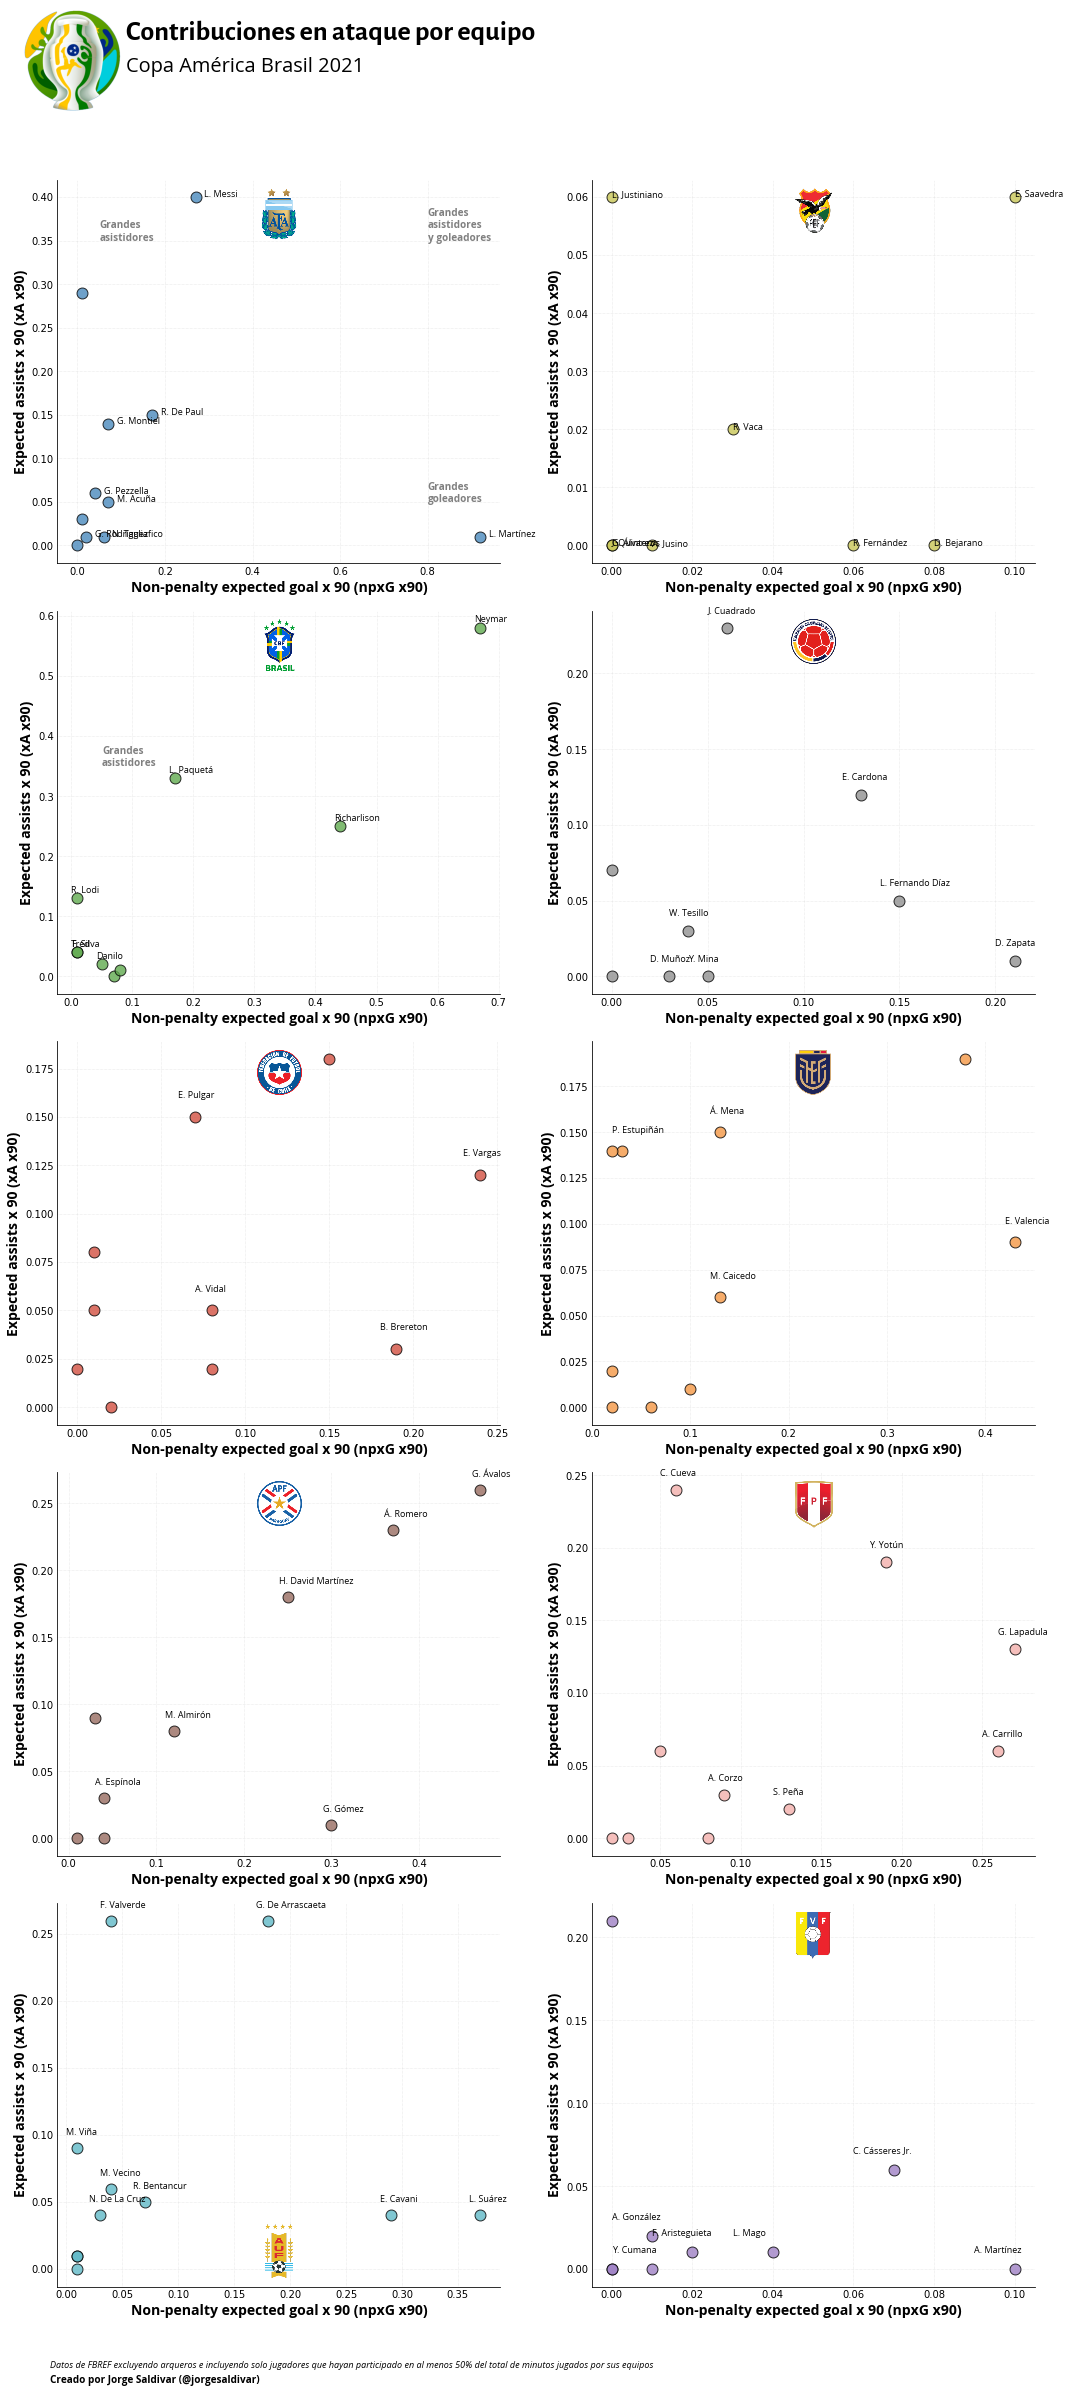

In [226]:
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,30))
fig.set_facecolor(background)

colors = {'argentina':'#4A8ABD', 'bolivia':'#C8C656', 'brazil':'#61AA4F', 'colombia':'#919191' , 
          'chile':'#D25041', 'ecuador': '#F49845', 'paraguay': '#976C60', 'peru': '#F3B0AB', 'uruguay': '#60B9C7',
          'venezuela': '#9F81C5'}

idx = 0    
for i in range(0,5):
    for j in range(0,2):
        # set figure's params
        axs[i][j].patch.set_alpha(0)
        axs[i][j].grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)
        axs[i][j].tick_params(axis="both",length=0)
        spines = ["top","right", "bottom", "left"]
        for s in spines:
            if s in ["top","right"]:
                axs[i][j].spines[s].set_visible(False)
            else:
                axs[i][j].spines[s].set_color(text_color)
        team = analysis_fdf[analysis_fdf['country']==countries[idx]]
        x = team['per90minutes_npxg'].values
        y = team['per90minutes_xa'].values
        axs[i][j].scatter(x, y, s=120, color=colors[countries[idx]], alpha=0.8, lw=1, zorder=2, edgecolor='black')
        # add players' names
        x_25 = team['per90minutes_npxg'].describe()['25%']
        y_25 = team['per90minutes_xa'].describe()['25%']
        for k, player_name in enumerate(team['player']):
            if y[k] < y_25 or x[k] < x_25:
                    continue
            if countries[idx] == 'argentina':
                delta_x = 0.02
                delta_y = 0
            elif countries[idx] == 'bolivia':
                delta_x = 0
                delta_y = 0
            else:
                delta_x = -0.01
                delta_y = 0.01
            f_player_name = player_name
            if ' ' in f_player_name:
                f_player_name = f"{f_player_name[0]}. {' '.join(f_player_name.split(' ')[1:])}"
            axs[i][j].annotate(f_player_name, (x[k]+delta_x, y[k]+delta_y), fontfamily=body_font, 
                               fontweight="regular", fontsize=9, color=text_color, zorder=3)
        # add axis labels
        axs[i][j].set_xlabel(f"Non-penalty expected goal x 90 (npxG x90)", fontfamily=body_font, fontweight="bold", 
                             fontsize=14, color=text_color)
        axs[i][j].set_ylabel(f"Expected assists x 90 (xA x90)", fontfamily=body_font, fontweight="bold", fontsize=14, 
                             color=text_color)
        # add logo
        if countries[idx] == 'uruguay':
            loc='lower center'
        else:
            loc='upper center'
        img = Image.open(f"imgs/logos/{countries[idx]}.png")
        imagebox = OffsetImage(img, zoom=0.3)
        ab = AnchoredOffsetbox(loc=loc, child=imagebox, frameon=False)
        axs[i][j].add_artist(ab)

        axs[i][j].annotate('Grandes\nasistidores',(0.05, 0.35), fontfamily=body_font, fontweight="bold", fontsize=10, 
                    color='gray', zorder=3)
        axs[i][j].annotate('Grandes\nasistidores\ny goleadores',
                    (0.8, 0.35), fontfamily=body_font, fontweight="bold", fontsize=10, color='gray', zorder=3)
        axs[i][j].annotate('Grandes\ngoleadores', (0.8, 0.05), fontfamily=body_font, 
                    fontweight="bold", fontsize=10, color='gray', zorder=3)
        
        # add horizontal lines
        #axs[i][j].axhline(y=team['per90minutes_xa'].describe()['25%'], color='gray', linestyle='dotted', lw=1)
        #axs[i][j].axhline(y=team['per90minutes_xa'].describe()['50%'], color='gray', linestyle='dotted', lw=1)
        #axs[i][j].axhline(y=team['per90minutes_xa'].describe()['75%'], color='gray', linestyle='dotted', lw=1)
        # add vertical lines
        #axs[i][j].axvline(x=team['per90minutes_npxg'].describe()['25%'], color='gray', linestyle='dotted', lw=1)
        #axs[i][j].axvline(x=team['per90minutes_npxg'].describe()['50%'], color='gray', linestyle='dotted', lw=1)
        #axs[i][j].axvline(x=team['per90minutes_npxg'].describe()['75%'], color='gray', linestyle='dotted', lw=1)
        idx += 1

## add title
fig.text(0.12,1.06,"Contribuciones en ataque por equipo",fontweight="bold", fontsize=28,fontfamily=title_font, color=text_color)
fig.text(0.12,1.045,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, color=text_color)

## add logo
ax2 = fig.add_axes([0.02,1,0.10,0.10]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)

## add footer
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.025, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF excluyendo arqueros e incluyendo solo jugadores que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.018, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.tight_layout()
plt.show()